<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/ML-Manuel/TFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [8]:
!git clone -b ML-Manuel https://github.com/ManuelBagasina/DATCapstone.git
%cd DATCapstone/data

Cloning into 'DATCapstone'...
remote: Enumerating objects: 641, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 641 (delta 77), reused 25 (delta 25), pack-reused 517 (from 3)
Receiving objects: 100% (641/641), 68.02 MiB | 23.01 MiB/s, done.
Resolving deltas: 100% (330/330), done.
/content/DATCapstone/data


## Preprocessing for Random Forest

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

In [64]:
from zipfile import ZipFile
import pandas as pd

# Explicitly extract data.csv from ZIP
with ZipFile('_data.csv.zip', 'r') as z:
    with z.open('data.csv') as f:  # Ignore macOS metadata files
        df = pd.read_csv(f, index_col=0)

# Convert date and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])


In [65]:
#Read Data
# df = pd.read_csv('/Users/wonminkim/Projects/DATCapstone/data2/data.csv', index_col=0)
# Correct path for ZIP file
zip_path = '/content/DATCapstone/data/_data.csv.zip'

# Extract specific file from ZIP
with ZipFile(zip_path, 'r') as z:
    with z.open('data.csv') as f:  # Explicitly specify the file to extract
        df = pd.read_csv(f, index_col=0)


df['Date'] = pd.to_datetime(df['Date'])

#Forward fill -> micro, macro, stock / fill na -> sentiment
df[df.columns[1:40]] = df.groupby('Ticker')[df.columns[1:40]].ffill()
df[df.columns[40:-5]] = df[df.columns[40:-5]].fillna(0)

df = df.dropna(subset=df.columns[0:-5])

# Sorting
df = df.sort_values(by=['Ticker', 'Date']).reset_index(drop=True)

# Lag feature (Exclude embedding columns)
lag_cols = df.columns[1:44]
lags = [1, 3, 5, 7, 14, 30]
lag_features = []

for col in lag_cols:
    for lag in lags:
        lagged = df.groupby('Ticker')[col].shift(lag)
        lag_features.append(lagged.rename(f'{col}_lag{lag}'))

lag_df = pd.concat(lag_features, axis=1)

df = pd.concat([df.reset_index(drop=True), lag_df.reset_index(drop=True)], axis=1)

In [66]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,neutral_lag5,neutral_lag7,neutral_lag14,neutral_lag30,positive_lag1,positive_lag3,positive_lag5,positive_lag7,positive_lag14,positive_lag30
0,2021-09-30,140.983670,141.690258,138.648004,138.863907,89056700,0.0,0.0,23921.991,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-01,139.256450,140.257452,136.518433,139.992477,94639600,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,2021-10-04,139.119037,139.560665,135.694064,136.547852,98322000,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,2025-01-27,124.788521,128.388181,116.689260,118.409103,818830900,0.0,0.0,29723.864,4.0,...,0.571282,0.000000,0.999946,0.001172,0.000712,0.053954,0.048698,0.000000,0.000014,0.000014
5628,2025-01-28,121.798801,128.988143,116.239315,128.978149,579666400,0.0,0.0,29723.864,4.0,...,0.083897,0.333974,0.256342,0.007833,0.182257,0.013230,0.374254,0.000178,0.199403,0.000346
5629,2025-01-29,126.488367,126.878331,120.038963,123.688622,467120600,0.0,0.0,29723.864,4.0,...,0.140121,0.571282,0.181732,0.032715,0.119110,0.000712,0.053954,0.048698,0.013047,0.000541
5630,2025-01-30,123.088674,124.988501,118.089134,124.638535,392925500,0.0,0.0,29723.864,4.0,...,0.307131,0.083897,0.476841,0.000166,0.001830,0.182257,0.013230,0.374254,0.153314,0.001441


In [67]:
import glob
import pandas as pd

# Correct path for article CSVs in Google Colab
csv_files = glob.glob('/content/DATCapstone/data/*articles*.csv')
print("Found files:", csv_files)  # Debugging


Found files: ['/content/DATCapstone/data/AVGO_articles..csv', '/content/DATCapstone/data/META_articles..csv', '/content/DATCapstone/data/TSLA_articles..csv', '/content/DATCapstone/data/ADBE_articles.csv', '/content/DATCapstone/data/NVDA_articles..csv', '/content/DATCapstone/data/MSFT_articles..csv', '/content/DATCapstone/data/AAPL_articles.csv', '/content/DATCapstone/data/NFLX_articles..csv', '/content/DATCapstone/data/GOOGL_articles..csv', '/content/DATCapstone/data/AMZN_articles..csv']


In [68]:
!ls /content/DATCapstone/data/*articles*.csv


/content/DATCapstone/data/AAPL_articles.csv
/content/DATCapstone/data/ADBE_articles.csv
/content/DATCapstone/data/AMZN_articles..csv
/content/DATCapstone/data/AVGO_articles..csv
/content/DATCapstone/data/GOOGL_articles..csv
/content/DATCapstone/data/META_articles..csv
/content/DATCapstone/data/MSFT_articles..csv
/content/DATCapstone/data/NFLX_articles..csv
/content/DATCapstone/data/NVDA_articles..csv
/content/DATCapstone/data/TSLA_articles..csv


In [69]:
if not csv_files:
    print("No article files found. Initializing empty columns.")
    df_articles = pd.DataFrame(columns=['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive'])
else:
    # Your existing processing code
    df_articles_list = []
    for file in csv_files:
        ticker = os.path.basename(file).split('_')[0]
        df_articles = pd.read_csv(file)
        df_articles['Ticker'] = ticker
        df_articles_list.append(df_articles)

    df_articles = pd.concat(df_articles_list, ignore_index=True)

    # Preprocessing steps...
# Articles dataframe preprocessing
df_articles["Date"] = pd.to_datetime(df_articles["time"], errors='coerce', utc=True).dt.tz_convert(None).dt.date
df_articles = df_articles[['Date', 'Ticker', 'sentiment']]
sentiment_dummies = pd.get_dummies(df_articles['sentiment'])
df_encoded = pd.concat([df_articles[['Date', 'Ticker']], sentiment_dummies], axis=1)
df_articles = df_encoded.groupby(['Date', 'Ticker']).sum().reset_index()
df_articles['Date'] = pd.to_datetime(df_articles['Date'])

df_articles['articles_avg_sentiment'] = (df_articles['Negative'] * -1 + df_articles['Neutral'] * 0 + df_articles['Positive']) / (df_articles['Negative'] + df_articles['Neutral'] + df_articles['Positive'])
df_articles.columns = ['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive', 'Articles_avg_sentiment']
df_articles

df = pd.merge(df, df_articles, on=['Date', 'Ticker'], how = 'left')

# Fill 0 except the target columns
df[[col for col in df.columns if 'Target' not in col]] = df[[col for col in df.columns if 'Target' not in col]].fillna(0)

In [70]:
import glob

# Read articles df
csv_files = glob.glob(os.path.join("*_articles*.csv")) # Updated to reflect file naming pattern

df_articles_list = []

for file in csv_files:
    # get ticker from filename
    ticker = os.path.basename(file).split('_')[0]
    df_articles = pd.read_csv(file)
    df_articles['Ticker'] = ticker
    df_articles_list.append(df_articles)

# concat articles dataframe
df_articles = pd.concat(df_articles_list, ignore_index=True)

# Articles dataframe preprocessing
df_articles["Date"] = pd.to_datetime(df_articles["time"], errors='coerce', utc=True).dt.tz_convert(None).dt.date
df_articles = df_articles[['Date', 'Ticker', 'sentiment']]
sentiment_dummies = pd.get_dummies(df_articles['sentiment'])
df_encoded = pd.concat([df_articles[['Date', 'Ticker']], sentiment_dummies], axis=1)
df_articles = df_encoded.groupby(['Date', 'Ticker']).sum().reset_index()
df_articles['Date'] = pd.to_datetime(df_articles['Date'])

df_articles['articles_avg_sentiment'] = (df_articles['Negative'] * -1 + df_articles['Neutral'] * 0 + df_articles['Positive']) / (df_articles['Negative'] + df_articles['Neutral'] + df_articles['Positive'])
df_articles.columns = ['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive', 'Articles_avg_sentiment']
df_articles

df = pd.merge(df, df_articles, on=['Date', 'Ticker'], how = 'left')

# Fill 0 except the target columns
df[[col for col in df.columns if 'Target' not in col]] = df[[col for col in df.columns if 'Target' not in col]].fillna(0)

In [71]:
print(df_articles.columns)

Index(['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral',
       'Articles_positive', 'Articles_avg_sentiment'],
      dtype='object')


In [72]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=0.95, random_state=42)
emb_cols = [col for col in df.columns if col.startswith("emb_")]
X_emb = df[emb_cols]
X_emb_pca = pca.fit_transform(X_emb)

# PCA columns
pca_columns = [f"emb_pca_{i}" for i in range(X_emb_pca.shape[1])]
df_pca_part = pd.DataFrame(X_emb_pca, columns=pca_columns, index=df.index)
df_non_pca = df.drop(columns=emb_cols)

df_pca = pd.concat([df_non_pca.reset_index(drop=True), df_pca_part.reset_index(drop=True)], axis=1)

# 결과 확인
df_pca.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,emb_pca_74,emb_pca_75,emb_pca_76,emb_pca_77,emb_pca_78,emb_pca_79,emb_pca_80,emb_pca_81,emb_pca_82,emb_pca_83
0,2021-09-30,140.983670,141.690258,138.648004,138.863907,89056700,0.0,0.0,23921.991,4.7,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
1,2021-10-01,139.256450,140.257452,136.518433,139.992477,94639600,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
2,2021-10-04,139.119037,139.560665,135.694064,136.547852,98322000,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022


## Preprocessing for TFT

In [2]:
# Data Preprocessing Helper for TFT Model
# This script helps prepare your data for the TFT model

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data_for_tft(df, target_col='Close', prediction_horizon=1,
                           encoder_length=30, use_embeddings=False,
                           pca_components=10, test_size=0.2):
    """
    Preprocess data for the Temporal Fusion Transformer model.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing stock data
    target_col : str
        Column name to predict (default: 'Close')
    prediction_horizon : int
        Number of days ahead to predict (default: 1)
    encoder_length : int
        Number of days to use as context for prediction (default: 30)
    use_embeddings : bool
        Whether to keep embedding columns (default: False)
    pca_components : int
        Number of PCA components if reducing embeddings (default: 10)
    test_size : float
        Fraction of data to use for testing (default: 0.2)

    Returns:
    --------
    pandas.DataFrame
        Processed dataframe ready for TFT model
    """
    print(f"Input dataframe shape: {df.shape}")

    # Ensure Date is datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])

    # Sort by Ticker and Date
    if 'Ticker' in df.columns:
        df = df.sort_values(['Ticker', 'Date'])
    else:
        raise ValueError("DataFrame must have a 'Ticker' column")

    # Remove lag features as TFT handles time dependencies
    lag_columns = [col for col in df.columns if '_lag' in col]
    print(f"Removing {len(lag_columns)} lag columns")
    df_no_lag = df.drop(columns=lag_columns)

    # Handle embedding columns
    emb_columns = [col for col in df_no_lag.columns if col.startswith('emb_')]
    print(f"Found {len(emb_columns)} embedding columns")

    if len(emb_columns) > 0:
        if not use_embeddings:
            # Option 1: Remove embeddings
            df_processed = df_no_lag.drop(columns=emb_columns)
            print("Embeddings removed")
        else:
            # Option 2: Reduce dimensions with PCA
            print(f"Reducing embeddings to {pca_components} components with PCA")
            # Check for null values in embedding columns
            null_counts = df_no_lag[emb_columns].isnull().sum()
            if null_counts.sum() > 0:
                print(f"Warning: Found {null_counts.sum()} null values in embedding columns")
                # Fill nulls with 0 for PCA
                df_no_lag[emb_columns] = df_no_lag[emb_columns].fillna(0)

            # Apply PCA
            emb_data = df_no_lag[emb_columns].values
            pca = PCA(n_components=pca_components)
            emb_pca = pca.fit_transform(emb_data)

            # Create new dataframe with PCA components
            df_processed = df_no_lag.drop(columns=emb_columns)
            for i in range(pca_components):
                df_processed[f'emb_pca_{i}'] = emb_pca[:, i]

            # Print variance explained
            var_explained = pca.explained_variance_ratio_.sum()
            print(f"PCA captures {var_explained:.2%} of embedding variance")
    else:
        df_processed = df_no_lag

    # Create time index for TFT
    df_processed['time_idx'] = df_processed.groupby('Ticker')['Date'].rank(method='dense').astype(int) - 1

    # Create train/test split
    cutoffs = {}
    for ticker in df_processed['Ticker'].unique():
        ticker_data = df_processed[df_processed['Ticker'] == ticker]
        cutoffs[ticker] = ticker_data['time_idx'].max() * (1 - test_size)

    df_processed['is_train'] = True
    for ticker, cutoff in cutoffs.items():
        df_processed.loc[(df_processed['Ticker'] == ticker) &
                        (df_processed['time_idx'] > cutoff), 'is_train'] = False



# TFT Model 1 (Obsolete)

## Libraries

In [73]:
# Install
!pip install pytorch-lightning
!pip install pytorch-forecasting

In [74]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
import torch

In [75]:
# PyTorch Lightning and PyTorch Forecasting
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss, MAE, RMSE
from pytorch_forecasting.data import GroupNormalizer, NaNLabelEncoder

# Scikit-learn for metrics and preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

## Setup

In [76]:
# Set random seeds for reproducibility
pl.seed_everything(42)
torch.manual_seed(42)
np.random.seed(42)

INFO:lightning_fabric.utilities.seed:Seed set to 42


In [77]:
# ========== 2. Resolving the NaN/Inf Target Issue ==========
# First, inspect Target_1day before any operations
print(f"Original dataframe shape: {df.shape}")
print(f"Total NaN in Target_1day: {df['Target_1day'].isna().sum()}")
print(f"Total inf in Target_1day: {np.isinf(df['Target_1day']).sum()}")

# Create a deep copy to avoid modifying the original df
working_df = df.copy()

# Very aggressive approach to handle Target_1day
# 1. First, let's print some statistics about Target_1day
target_val = working_df['Target_1day']
print(f"\nTarget_1day stats before cleaning:")
print(f"Min: {target_val.min()}")
print(f"Max: {target_val.max()}")
print(f"Mean: {target_val.mean()}")
print(f"Std: {target_val.std()}")

# 2. Replace NaN and inf with 0 in the target column
working_df['Target_1day'] = working_df['Target_1day'].replace([np.nan, np.inf, -np.inf], 0)

# 3. Verify the target is free of NaN and inf
print(f"\nAfter replacement:")
print(f"NaN in Target_1day: {working_df['Target_1day'].isna().sum()}")
print(f"Inf in Target_1day: {np.isinf(working_df['Target_1day']).sum()}")

# ========== 3. Additional Feature Checks ==========
# Create time index for TFT
working_df = working_df.sort_values(['Ticker', 'Date'])
working_df['time_idx'] = working_df.groupby('Ticker').cumcount()

# Define simple feature sets - using only crucial features that don't have NaN issues
categorical_vars = ['Ticker']

# Focus on a minimal set of relevant financial features
basic_features = [
    'Dividends', 'Stock Splits',
    'GDP (Billions USD)', 'Unemployment Rate (%)',
    'Producer Price Index (PPI)', 'Consumer Confidence Index',
    'Total Revenue', 'Operating Income', 'Net Income',
    'EBITDA', 'Gross Profit'
]

# Check which features exist and don't have NaN issues
valid_features = []
for col in basic_features:
    if col in working_df.columns:
        nan_count = working_df[col].isna().sum()
        inf_count = np.isinf(working_df[col]).sum()

        if nan_count > 0 or inf_count > 0:
            print(f"Feature {col}: {nan_count} NaNs, {inf_count} infs - filling with 0")
            working_df[col] = working_df[col].replace([np.nan, np.inf, -np.inf], 0)

        valid_features.append(col)

# Final features
continuous_vars = valid_features

print(f"\nSelected features:")
print(f"- Categorical ({len(categorical_vars)}): {categorical_vars}")
print(f"- Continuous ({len(continuous_vars)}): {continuous_vars}")
print(f"Total features: {len(categorical_vars) + len(continuous_vars)}")


Original dataframe shape: (5632, 1083)
Total NaN in Target_1day: 7
Total inf in Target_1day: 0

Target_1day stats before cleaning:
Min: -42.44155883789063
Max: 43.88923645019531
Mean: 0.10996016370985243
Std: 3.587426056358569

After replacement:
NaN in Target_1day: 0
Inf in Target_1day: 0

Selected features:
- Categorical (1): ['Ticker']
- Continuous (11): ['Dividends', 'Stock Splits', 'GDP (Billions USD)', 'Unemployment Rate (%)', 'Producer Price Index (PPI)', 'Consumer Confidence Index', 'Total Revenue', 'Operating Income', 'Net Income', 'EBITDA', 'Gross Profit']
Total features: 12


In [78]:
# ========== 4. Create Training and Validation Sets ==========
# Set prediction parameters
MAX_PREDICTION_LENGTH = 1  # Predict 1 day ahead
MAX_ENCODER_LENGTH = 30    # Use 30 days of history for prediction

# Split data into train and validation sets
cutoff_date = working_df['Date'].max() - timedelta(days=30)
train_df = working_df[working_df['Date'] <= cutoff_date].copy()
val_df = working_df[working_df['Date'] > cutoff_date].copy()

print(f"\nTraining data: {train_df.shape} rows, {train_df['Date'].min()} to {train_df['Date'].max()}")
print(f"Validation data: {val_df.shape} rows, {val_df['Date'].min()} to {val_df['Date'].max()}")

# Final verification - ensure there are absolutely no NaN or inf values in any used column
TARGET = "Target_1week"

print("\nFinal verification:")
for col in [TARGET] + continuous_vars:
    nan_count = train_df[col].isna().sum()
    inf_count = np.isinf(train_df[col]).sum()
    if nan_count > 0 or inf_count > 0:
        print(f"Warning: {col} still has {nan_count} NaNs and {inf_count} infs - fixing")
        train_df[col] = train_df[col].replace([np.nan, np.inf, -np.inf], 0)

    nan_count = val_df[col].isna().sum()
    inf_count = np.isinf(val_df[col]).sum()
    if nan_count > 0 or inf_count > 0:
        print(f"Warning: {col} still has {nan_count} NaNs and {inf_count} infs in validation - fixing")
        val_df[col] = val_df[col].replace([np.nan, np.inf, -np.inf], 0)


Training data: (5492, 1084) rows, 2021-06-30 00:00:00 to 2024-12-31 00:00:00
Validation data: (140, 1084) rows, 2025-01-02 00:00:00 to 2025-01-31 00:00:00

Final verification:



Creating TimeSeriesDataSet...
Error creating TimeSeriesDataSet: 2481 (45.17%) of Target_1week values were found to be NA or infinite (even after encoding). NA values are not allowed `allow_missing_timesteps` refers to missing rows, not to missing values. Possible strategies to fix the issue are (a) dropping the variable Target_1week, (b) using `NaNLabelEncoder(add_nan=True)` for categorical variables, (c) filling missing values and/or (d) optionally adding a variable indicating filled values


ValueError: 2481 (45.17%) of Target_1week values were found to be NA or infinite (even after encoding). NA values are not allowed `allow_missing_timesteps` refers to missing rows, not to missing values. Possible strategies to fix the issue are (a) dropping the variable Target_1week, (b) using `NaNLabelEncoder(add_nan=True)` for categorical variables, (c) filling missing values and/or (d) optionally adding a variable indicating filled values

In [ ]:
# ========== 6. Create and Train TFT Model ==========
# Create the TFT model
tft = TemporalFusionTransformer.from_dataset(
    train_dataset,
    learning_rate=0.001,
    hidden_size=32,       # Reduced size to avoid overfitting
    attention_head_size=2,
    dropout=0.2,          # Increased dropout for regularization
    hidden_continuous_size=16,
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=3,
    weight_decay=1e-2,
)

print(f"TFT model size: {tft.size()/1e3:.1f}k parameters")

# Define callbacks
early_stop_callback = EarlyStopping(
    monitor="val_loss",
    min_delta=1e-4,
    patience=5,
    verbose=True,
    mode="min"
)
lr_monitor = LearningRateMonitor(logging_interval="epoch")

# Initialize trainer
trainer = pl.Trainer(
    max_epochs=15,        # Reduced epochs for faster training
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    devices=1,
    gradient_clip_val=0.1,
    callbacks=[early_stop_callback, lr_monitor],
    enable_model_summary=True,
    limit_train_batches=50,  # For faster training (remove for full training)
    limit_val_batches=20,    # For faster training (remove for full training)
)

print("\nStarting TFT model training...")
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)
print("Training completed!")

# Save the model
model_path = "tft_stock_model.ckpt"
trainer.save_checkpoint(model_path)
print(f"Model saved to {model_path}")

In [ ]:
# ========== 7. Evaluate Model ==========
# Make predictions
predictions = tft.predict(
    val_dataloader,
    return_x=True,
    return_y=True,
    mode="prediction"
)

# Extract actual and predicted values
actuals = []
predicted = []
tickers = []

# Get validation data
for x, y in iter(val_dataloader):
    actuals.extend(y[0].cpu().numpy().flatten())
    batch_tickers = x["groups"]["Ticker"]
    tickers.extend(batch_tickers)

# Get median predictions (quantile=0.5)
predicted = predictions.output.prediction.cpu().numpy()[:, 0, 0]

# Ensure we have the same number of predictions as actuals
min_len = min(len(actuals), len(predicted), len(tickers))
actuals = actuals[:min_len]
predicted = predicted[:min_len]
tickers = tickers[:min_len]

# Create results dataframe
results_df = pd.DataFrame({
    "Ticker": tickers,
    "Actual": actuals,
    "Predicted": predicted,
    "Error": predicted - actuals
})

# Calculate metrics
mae = mean_absolute_error(actuals, predicted)
mse = mean_squared_error(actuals, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actuals, predicted)

print("\n----- Validation Metrics -----")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# ========== 8. Visualize Results ==========
# Plot overall results
plt.figure(figsize=(12, 6))
sample_size = min(100, len(actuals))
plt.plot(actuals[:sample_size], label='Actual')
plt.plot(predicted[:sample_size], label='Predicted')
plt.title(f'Actual vs Predicted {TARGET}')
plt.xlabel('Sample Index')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)
plt.savefig('tft_prediction_results.png')
plt.show()

# Plot results by ticker
plt.figure(figsize=(15, 10))
ticker_list = list(results_df["Ticker"].unique())[:4]  # First 4 tickers
for i, ticker in enumerate(ticker_list):
    ticker_df = results_df[results_df["Ticker"] == ticker]
    if len(ticker_df) > 0:
        plt.subplot(2, 2, i+1)
        plt.plot(ticker_df["Actual"].values, label=f'Actual ({ticker})')
        plt.plot(ticker_df["Predicted"].values, label=f'Predicted ({ticker})')
        plt.title(f'Ticker: {ticker}')
        plt.xlabel('Sample Index')
        plt.ylabel('Price Change')
        plt.legend()
        plt.grid(True)
plt.tight_layout()
plt.savefig('tft_ticker_predictions.png')
plt.show()

# Analyze feature importance
print("\nAnalyzing feature importance...")
interpretation = tft.interpret_output(predictions.x, predictions.output)

# Plot feature importance
plt.figure(figsize=(15, 10))
tft.plot_interpretation(interpretation)
plt.tight_layout()
plt.savefig('tft_feature_importance.png')
plt.show()

# Print top features
if "encoder_variables" in interpretation:
    encoder_vars = tft.encoder_variables
    encoder_importance = interpretation["encoder_variables"][0].mean(0).mean(0).cpu().numpy()

    print("\nTop most important features:")
    for i, (var, imp) in enumerate(sorted(zip(encoder_vars, encoder_importance),
                                      key=lambda x: x[1], reverse=True)[:10]):
        print(f"{i+1}. {var}: {imp:.4f}")

print("\nTFT model evaluation completed!")

# New Model (To be built)

## Setups

In [ ]:
!git clone -b ML-Manuel https://github.com/ManuelBagasina/DATCapstone.git
%cd DATCapstone/data

In [4]:
!pip install pytorch-lightning
!pip install pytorch-forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 43.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

## Import

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
import pytorch_lightning as pl
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, RMSE, SMAPE
import os
import warnings
warnings.filterwarnings('ignore')

In [14]:
from zipfile import ZipFile
import pandas as pd

# Explicitly extract data.csv from ZIP
with ZipFile('_data.csv.zip', 'r') as z:
    with z.open('data.csv') as f:  # Ignore macOS metadata files
        df = pd.read_csv(f, index_col=0)


In [15]:
# Check if GPU is available
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU device: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU")

CUDA available: False
Using CPU


## Data Preparation

In [18]:
# =====================================================================
# Data Loading and Preprocessing
# =====================================================================

# Load the dataframe
print(f"Original dataframe shape: {df.shape}")

# Basic data exploration
print("\nFirst few rows:")
print(df.head())

print("\nUnique tickers:")
print(df['Ticker'].unique())
print(f"Number of unique tickers: {df['Ticker'].nunique()}")

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

Original dataframe shape: (8103, 817)

First few rows:
        Date       Open       High        Low      Close    Volume  Dividends  \
0 2021-06-01  75.393341  75.630189  74.351213  75.383865  10485300        0.0   
1 2021-06-02  75.507015  76.672309  75.327016  76.047028  12249300        0.0   
2 2021-06-03  75.601763  77.174428  75.459653  76.823891  12038700        0.0   
3 2021-06-04  77.136525  79.542898  77.089160  78.529190  14502900        0.0   
4 2021-06-07  78.576573  79.817653  78.491304  79.523964  10445600        0.0   

   Stock Splits  GDP (Billions USD)  Unemployment Rate (%)  ...  emb_763  \
0           0.0           23368.861                    5.9  ...      NaN   
1           0.0           23368.861                    5.9  ...      NaN   
2           0.0           23368.861                    5.9  ...      NaN   
3           0.0           23368.861                    5.9  ...      NaN   
4           0.0           23368.861                    5.9  ...      NaN   

 

In [20]:
# =====================================================================
# TFT Model Preparation
# =====================================================================

# Remove lag features since TFT will handle time dependencies
lag_columns = [col for col in df.columns if '_lag' in col]
print(f"\nRemoving {len(lag_columns)} lag columns from the dataset")
df_no_lag = df.drop(columns=lag_columns)

# Handle embedding columns - Either keep them or use PCA to reduce dimensionality
# Identify embedding columns
emb_columns = [col for col in df_no_lag.columns if col.startswith('emb_')]
print(f"\nFound {len(emb_columns)} embedding columns")

# Option 1: Remove embedding columns since they might be too many for TFT
df_no_emb = df_no_lag.drop(columns=emb_columns)

# We'll work with the version without embeddings for simplicity
df_processed = df_no_emb



Removing 0 lag columns from the dataset

Found 768 embedding columns


In [21]:
# Select target and features for the model
target = 'Close'  # Or could be 'Target_1day', etc., for direct prediction of price difference

# Select relevant features for prediction
# Exclude Date, target variables, and other non-predictive columns
exclude_columns = ['Date'] + [col for col in df_processed.columns if col.startswith('Target_')]
if target not in exclude_columns:
    exclude_columns.append(target)

features = [col for col in df_processed.columns if col not in exclude_columns]
print(f"\nUsing {len(features)} features for prediction")

# Prepare data for TFT
# Sort data by ticker and date
df_processed = df_processed.sort_values(['Ticker', 'Date'])

# Calculate the max prediction length based on your targets
# If predicting Target_1day, max_prediction_length=1
# If predicting Target_1week, max_prediction_length=5 (assuming 5 trading days)
# If predicting Target_1month, max_prediction_length=20
max_prediction_length = 1  # Adjust based on your prediction horizon

# Set the number of days to use as context for the model
max_encoder_length = 30  # Use 30 days of history for prediction

# Define time index for TFT
# We need to create a time_idx column that increases for each date
df_processed['time_idx'] = df_processed.groupby('Ticker')['Date'].rank(method='dense').astype(int) - 1


Using 43 features for prediction


In [22]:
# Create a training dataset
# Use the last 20% of the data for testing
val_cutoff = df_processed['time_idx'].max() - max_prediction_length
cutoffs = {}
for ticker in df_processed['Ticker'].unique():
    ticker_data = df_processed[df_processed['Ticker'] == ticker]
    cutoffs[ticker] = ticker_data['time_idx'].max() * 0.8

df_processed['is_train'] = True
for ticker, cutoff in cutoffs.items():
    df_processed.loc[(df_processed['Ticker'] == ticker) &
                    (df_processed['time_idx'] > cutoff), 'is_train'] = False

In [23]:
# Create TimeSeriesDataSet for training
training = TimeSeriesDataSet(
    data=df_processed[df_processed['is_train']],
    time_idx="time_idx",
    target=target,
    group_ids=["Ticker"],
    min_encoder_length=max_encoder_length // 2,  # Minimum allowed encoder length
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],  # No static categorical features
    static_reals=[],  # No static real features
    time_varying_known_categoricals=[],  # No time-varying known categorical features
    time_varying_known_reals=["time_idx"],  # Time index is a known real
    time_varying_unknown_categoricals=[],  # No time-varying unknown categorical features
    time_varying_unknown_reals=features,  # All features are unknown reals
    target_normalizer=GroupNormalizer(
        groups=["Ticker"], transformation="softplus"
    ),  # Normalize by ticker
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

KeyError: "Unknown category '0' encountered. Set `add_nan=True` to allow unknown categories"

In [24]:
# Create validation dataset using the same parameters as training
validation = TimeSeriesDataSet.from_dataset(
    training, df_processed[~df_processed['is_train']], predict=True, stop_randomization=True
)

# Create dataloaders for model training
batch_size = 64  # Adjust based on your GPU memory
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

NameError: name 'training' is not defined

## Training

In [25]:
# =====================================================================
# TFT Model Training
# =====================================================================

# Create the TFT model
pl.seed_everything(42)  # For reproducibility

INFO:lightning_fabric.utilities.seed:Seed set to 42


42

In [26]:
# Configure the TFT model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=32,  # Size of hidden layers
    attention_head_size=4,  # Number of attention heads
    dropout=0.1,  # Dropout rate
    hidden_continuous_size=16,  # Size of hidden layers for processing continuous variables
    loss=RMSE(),  # Loss function
    log_interval=10,  # How often to log during training
    reduce_on_plateau_patience=5,  # Reduce learning rate after 5 epochs without improvement
)

NameError: name 'training' is not defined

In [27]:
# Configure trainer
early_stop_callback = pl.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min"
)
lr_logger = pl.callbacks.LearningRateMonitor()

trainer = pl.Trainer(
    max_epochs=30,
    accelerator='auto',  # Use GPU if available
    gradient_clip_val=0.1,
    limit_train_batches=30,  # Adjust based on dataset size
    callbacks=[early_stop_callback, lr_logger],
)

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [28]:
# Train the model
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

NameError: name 'tft' is not defined

## Model Evaluation and Prediction

In [29]:
# Make predictions on the validation set
predictions = tft.predict(val_dataloader, return_y=True)

# Extract raw predictions and actual values
raw_predictions = predictions.output.detach().cpu().numpy()
raw_actuals = predictions.y.detach().cpu().numpy()

# Convert predictions to dataframe for easier analysis
pred_df = pd.DataFrame({
    'prediction': raw_predictions.flatten(),
    'actual': raw_actuals.flatten()
})

NameError: name 'tft' is not defined

In [30]:
# Calculate metrics
mae = mean_absolute_error(pred_df['actual'], pred_df['prediction'])
mse = mean_squared_error(pred_df['actual'], pred_df['prediction'])
rmse = np.sqrt(mse)
r2 = r2_score(pred_df['actual'], pred_df['prediction'])

NameError: name 'pred_df' is not defined

In [31]:
print("\nModel Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")



Model Performance:


NameError: name 'mae' is not defined

## Visualization

In [32]:
# Visualize predictions vs actuals
plt.figure(figsize=(12, 6))
plt.scatter(pred_df['actual'], pred_df['prediction'], alpha=0.5)
plt.plot([pred_df['actual'].min(), pred_df['actual'].max()],
         [pred_df['actual'].min(), pred_df['actual'].max()],
         'r--', lw=2)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('TFT Model Performance: Actual vs Predicted')
plt.grid(True)
plt.savefig('tft_performance.png')
plt.show()

NameError: name 'pred_df' is not defined

<Figure size 1200x600 with 0 Axes>

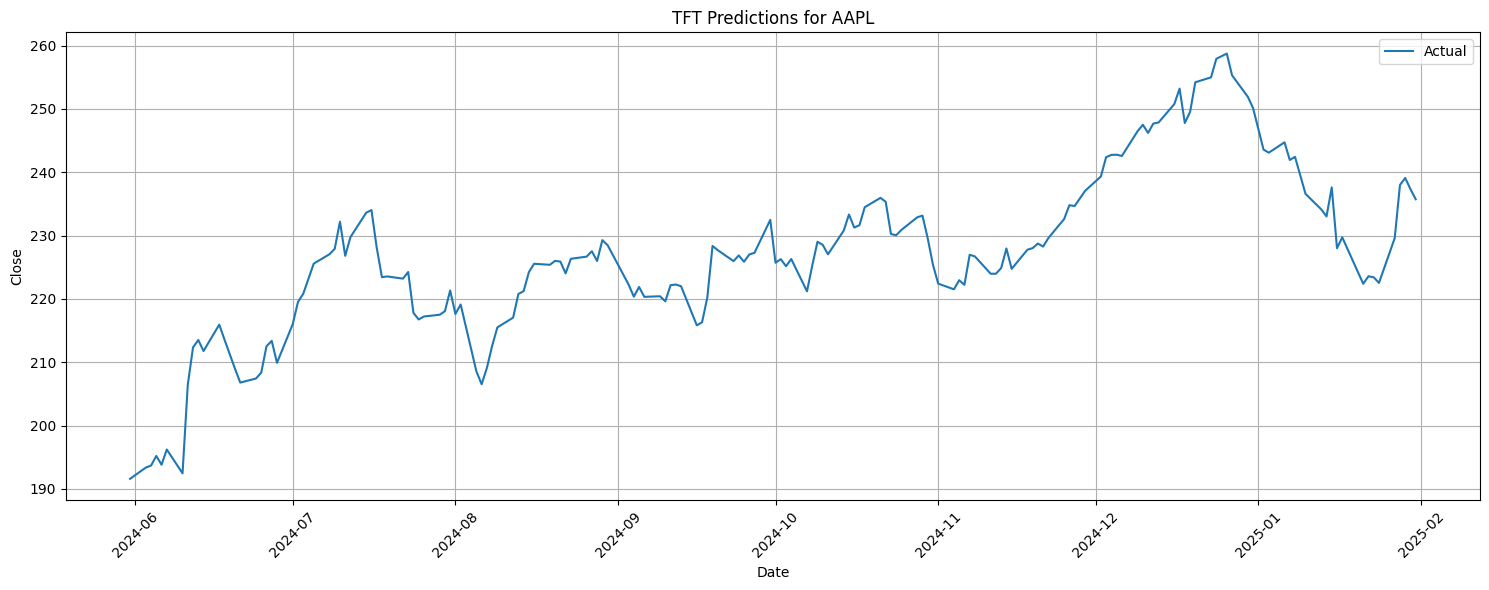

In [33]:
# Visualize predictions vs actuals over time for a specific stock
ticker_to_plot = df_processed['Ticker'].unique()[0]  # Choose first ticker
ticker_val_data = df_processed[(df_processed['Ticker'] == ticker_to_plot) & (~df_processed['is_train'])].copy()

# Get predictions for this ticker
# This will be more complex and would require matching predictions to the right dates
# Here's a simplified approach - you'll need to adapt this to your specific situation
if len(ticker_val_data) > 0:
    plt.figure(figsize=(15, 6))
    plt.plot(ticker_val_data['Date'], ticker_val_data[target], label='Actual')
    # You would add predictions here, after matching them to dates
    # plt.plot(ticker_val_data['Date'], ticker_predictions, label='Predicted')
    plt.title(f'TFT Predictions for {ticker_to_plot}')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'tft_predictions_{ticker_to_plot}.png')
    plt.show()

## Feature Importance

In [34]:
# Get feature importance from the TFT model
importances = tft.interpret_output(val_dataloader, reduction="mean")

NameError: name 'tft' is not defined

In [35]:
# Variable importance
plt.figure(figsize=(10, 8))
order = importances.mean(dim=["variable", "observation"]).argsort(descending=True)
plt.imshow(importances.mean(dim="observation").index_select(0, order), aspect="auto")
plt.title("Feature Importance")
plt.ylabel("Feature")
plt.colorbar()
plt.savefig('tft_feature_importance.png')
plt.show()

NameError: name 'importances' is not defined

<Figure size 1000x800 with 0 Axes>

## Saving Model

In [36]:
# Save the trained model
torch.save(tft.state_dict(), "tft_stock_model.pth")

print("\nModel training and evaluation complete. Check the output directory for visualization plots.")

NameError: name 'tft' is not defined